# Importing dataset

In [1]:
import pandas as pd
df=pd.read_csv("city_day.csv")
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [2]:
df.shape

(29531, 16)

In [3]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [4]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Data Cleaning

In [5]:
#Drop unwanted columns.
newdata=df.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
newdata.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [6]:
#Removing null values.
for i in newdata.columns:
    newdata[i].fillna(newdata[i].mean(),inplace=True)

In [7]:
newdata.isna().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [8]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   29531 non-null  float64
 1   PM10    29531 non-null  float64
 2   NO      29531 non-null  float64
 3   NO2     29531 non-null  float64
 4   CO      29531 non-null  float64
 5   SO2     29531 non-null  float64
 6   O3      29531 non-null  float64
 7   AQI     29531 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


In [9]:
#converting data into int datatype to avoid errors below.
newdf=newdata.astype(int)
newdf.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [10]:
newdf.tail()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
29526,15,50,7,25,0,8,23,41
29527,24,74,3,26,0,12,30,70
29528,22,65,3,29,0,8,30,68
29529,16,49,4,29,0,9,28,54
29530,15,66,0,26,0,2,17,50


In [11]:
newdf.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,17.061698,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,21.365891,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,6.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,11.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,17.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,390.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


# Data Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

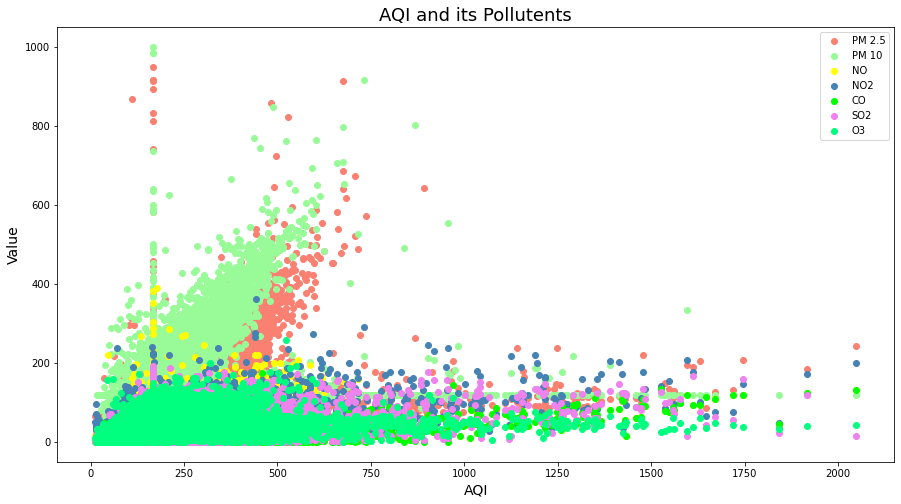

In [13]:
#to visualize distribution of data
x=newdf['AQI']
y1=newdf['PM2.5']
y2=newdf['PM10']
y3=newdf['NO']
y4=newdf['NO2']
y5=newdf['CO']
y6=newdf['SO2']
y7=newdf['O3']
plt.figure(figsize=(15,8))
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

<AxesSubplot:>

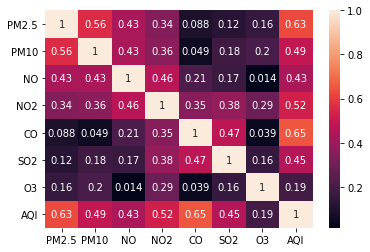

In [14]:
#to find correlation between different columns.
corr = newdf.corr() 
sns.heatmap(corr, annot=True)


Insights :

1.When the value of pollutents is less, Air Quality Index (AQI) is less.

2.AQI highly depends on

ground-level ozone

particle pollution (also known as particulate matter, including PM2.5 and PM10)

carbon monoxide

sulfur dioxide

nitrogen dioxide

# Spliting data

In [15]:
#Data training
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have our target i.e. Air Quality Index(AQI).
x=newdf[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]  
y=newdf['AQI']

In [16]:
print(x.shape)
print("------------------------------------------------------------------------------------------------------------------")
print(y.shape)

(29531, 7)
------------------------------------------------------------------------------------------------------------------
(29531,)


In [17]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
#Ratio used for splitting training and testing data is 8:2 respectively

# Model Building

Linear Regression

In [18]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [19]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [20]:
# Making predictions 
pred1 = reg1.predict(x_test)
pred1

array([129.96138276, 432.34184595, 186.29374805, ..., 145.3961151 ,
       471.62544507, 176.98466144])

In [21]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.7974427851422167


Lasso Regression

In [22]:
# Importing model
from sklearn.linear_model import Lasso
reg2 = Lasso()

In [23]:
# Fitting data into the model.
reg2.fit(x_train, y_train)

Lasso()

In [24]:
# Making predictions 
pred2 = reg2.predict(x_test)
pred2

array([129.98818213, 432.18623086, 186.11714685, ..., 145.36908209,
       471.51738237, 177.02255011])

In [25]:
print("Accuracy of the LassoRegression model comes to be: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the LassoRegression model comes to be: 
 
0.7974412197317694


Ridge Regression

In [26]:
# Importing model
from sklearn.linear_model import Ridge
reg3 = Ridge()

In [27]:
# Fitting data into the model.
reg3.fit(x_train, y_train)

Ridge()

In [28]:
# Making predictions 
pred3= reg3.predict(x_test)
pred3

array([129.96140477, 432.341875  , 186.293744  , ..., 145.39608119,
       471.62549327, 176.98475409])

In [29]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(reg3.score(x_train,y_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.7974427851418658



Decision Tree Regressor

In [30]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg4 = DecisionTreeRegressor()

In [31]:
#Fitting data into the model.
reg4.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
# Making predictions on Test data 
pred4 = reg4.predict(x_test)
pred4

array([ 98., 422., 296., ..., 166., 373., 124.])

In [33]:
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.9991370169769853


# Performance Evaluation

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format( np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format( np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(x_train,y_train)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 61.6450 	 		 0.7974
Lasso Regression 		 61.6464 	 		 0.7974
Ridge Regression 		 61.6450 	 		 0.7974
Decision Tree Regressor		 70.3110 	 		 0.9991


### Conclusion: Accuracy of Regression models- Linear regression, lasso regression and rigde regression is almost same.Whereas accuracy of decision tree regressor is higher and root mean sqaure error is least.Decision tree regressor is more efficient model.